# Libraries

In [24]:
# Libraries
# =================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Configure visualizations
#%matplotlib inline
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcParams['figure.figsize'] = 14, 8

# Constants
#RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


<h1 style="color:blue;">Load Dataset</h1>

1. Load the DS

In [25]:
#df = pd.read_csv("Kaggle-credit-card-fraud-detection-US_13Jul24/creditcard.csv")  # Imbalanced DS
df = pd.read_csv("Kaggle-credit-card-fraud-detection_18Sep23/creditcard_2023.csv") # Balanced DS


In [26]:
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

<h1 style="color:blue;">Data Exploration</h1>

In [27]:
df.shape

(568630, 31)

In [28]:
# Check Null
df.isnull().values.any()

False

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [30]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [31]:
#Lets check for missing values
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
# Lets check for duplicates if any
df.duplicated().any()

False

C:\Users\flyin\AppData\Local\Temp\ipykernel_4560\4095103176.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


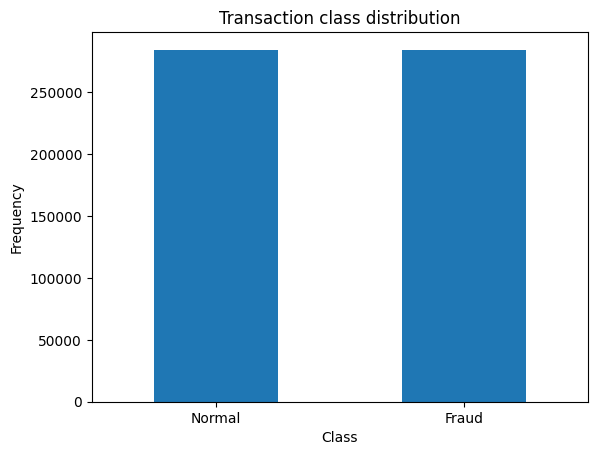

In [33]:
# Visualization
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

C:\Users\flyin\AppData\Local\Temp\ipykernel_4560\2444512823.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


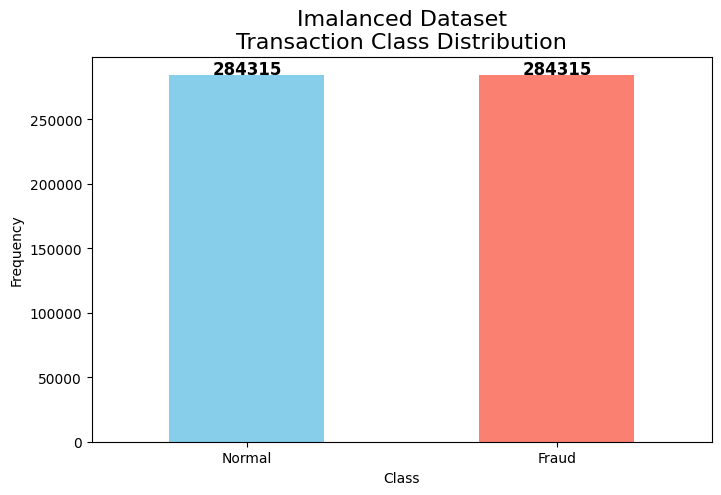

In [34]:
# Count the transactions
count_classes = pd.value_counts(df['Class'], sort=True)

# Set the plot size
plt.figure(figsize=(8, 5))

# Plot the bar chart
ax = count_classes.plot(kind='bar', rot=0, color=['skyblue', 'salmon'])
plt.title("Imalanced Dataset\nTransaction Class Distribution", fontsize=16)
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

# Add counts as text annotations
for i, count in enumerate(count_classes):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


Note : Dataset is balanced

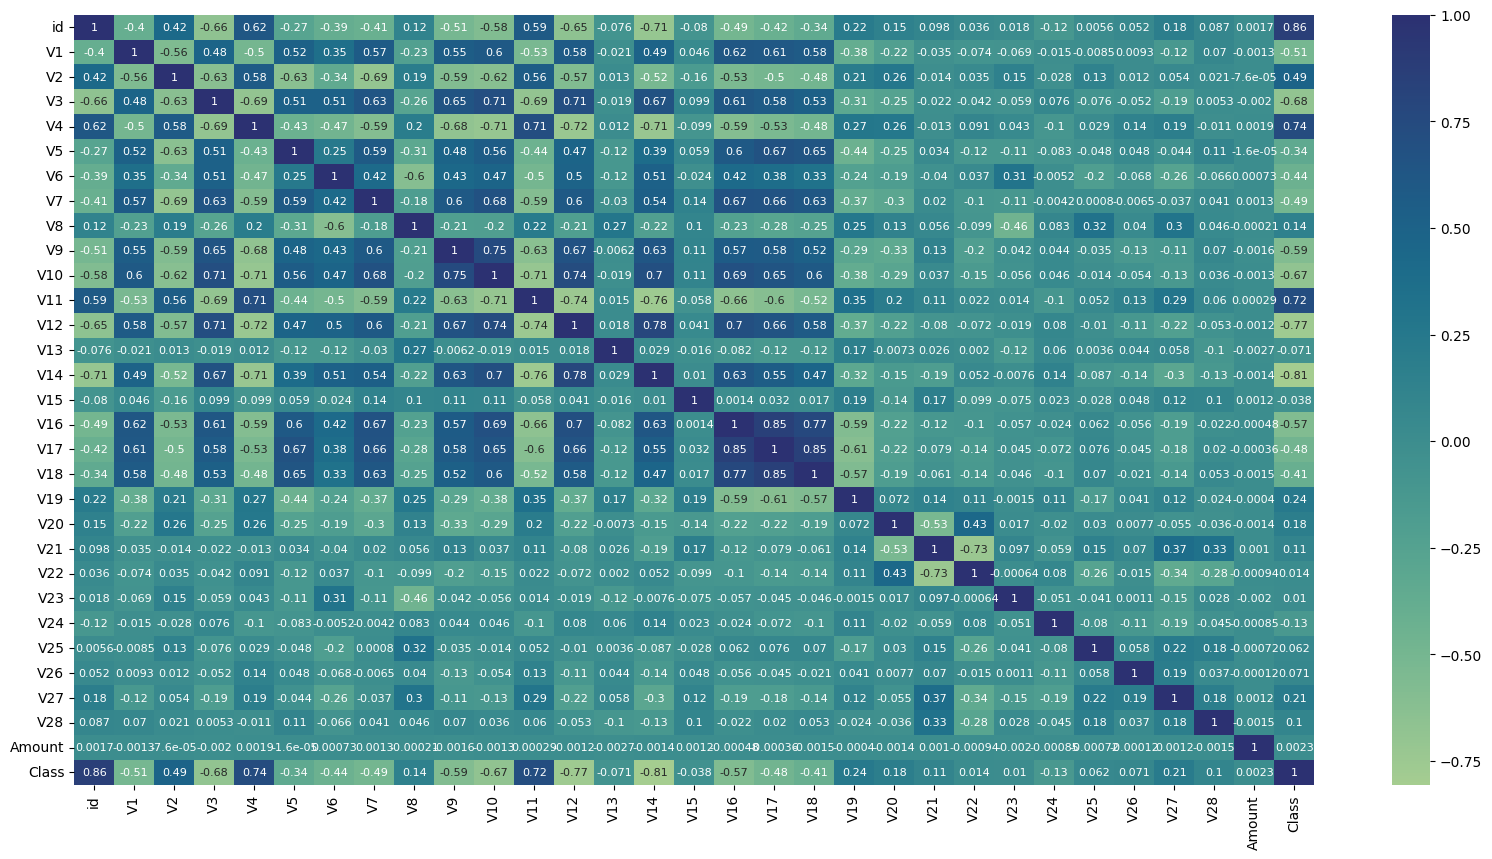

In [35]:
paper = plt.figure(figsize=[20, 10])
sns.heatmap(df.corr(), cmap='crest', annot=True, annot_kws={"size": 8})
plt.show()

In [36]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

print("frauds.shape:", frauds.shape)
print("normal.shape:", normal.shape)

frauds.shape: (284315, 31)
normal.shape: (284315, 31)


<h1 style="color:blue;">Data Preprocessing</h1>

Separate features and labels

In [37]:
X = df.drop(['Class'], axis=1)  # 'Class' is the fraud label
y = df['Class']

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (568630, 30)
y.shape: (568630,)


In [38]:
## Combine Oversampling the Minority Class + Undersampling the Majority Class

#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X, y)

#print("Resampled dataset shape:", X_resampled.shape, y_resampled.value_counts())

X_resampled = X
y_resampled = y

* above SMOTEEN logic commented as dataset is balanced
* create new dataframe for balanced dataset

In [39]:
# Convert X_resampled and y_resampled into a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Use the original column names for X
y_resampled_df = pd.Series(y_resampled, name='Class')          # Name the target column as 'Class'

# Combine X_resampled and y_resampled into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Preview the resampled DataFrame
print(df_resampled.head())



   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [40]:
frauds = df_resampled[df_resampled.Class == 1]
normal = df_resampled[df_resampled.Class == 0]
print("frauds.shape:", frauds.shape)
print("normal.shape:", normal.shape)

frauds.shape: (284315, 31)
normal.shape: (284315, 31)


======================================

<h1 style="color:blue;">Model Training (Hybrid)</h1>

<h2 style="color:blue;">Autoencoder Model</h2>

* Split Data using Blananced Dataset

In [41]:
# Split Data using Blananced Dataset
X = df_resampled.drop('Class', axis=1)
y = df_resampled['Class']

print("frauds.shape:", X.shape)
print("normal.shape:", y.shape)

frauds.shape: (568630, 30)
normal.shape: (568630,)


In [42]:
scaler = StandardScaler()
#X[['Time', 'Amount']] = scaler.fit_transform(X_resampled[['Time', 'Amount']])
X[['Amount']] = scaler.fit_transform(X_resampled[['Amount']])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (454904, 30)
X_test.shape: (113726, 30)
y_train.shape: (454904,)
y_test.shape: (113726,)


* PCA

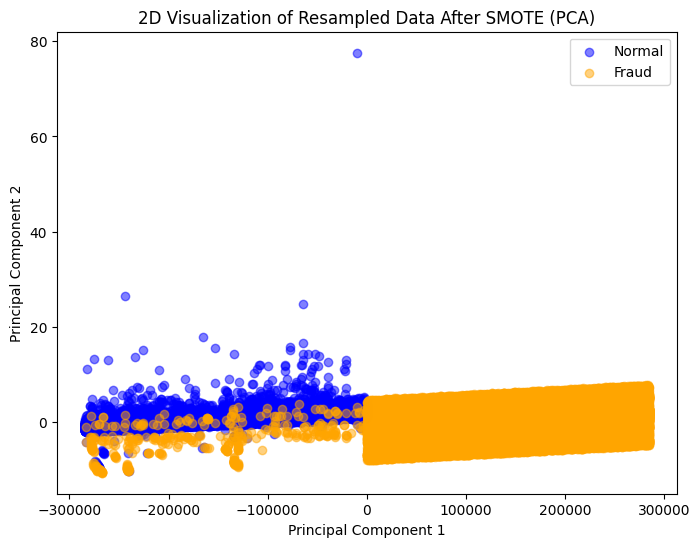

In [44]:
# PCA
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_sm_pca = pca.fit_transform(X_train)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for class_value, color, label in zip([0, 1], ['blue', 'orange'], ['Normal', 'Fraud']):
    plt.scatter(X_train_sm_pca[np.array(y_train) == class_value, 0],
                X_train_sm_pca[np.array(y_train) == class_value, 1],
                alpha=0.5, c=color, label=label)

plt.title('2D Visualization of Resampled Data After SMOTE (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


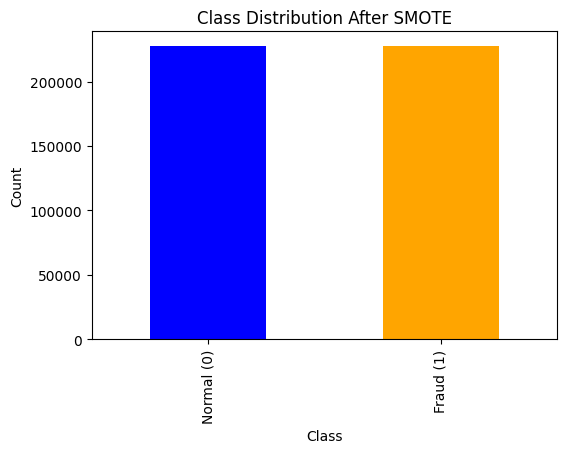

In [45]:
import matplotlib.pyplot as plt

# Visualizing class distribution after SMOTE
y_train.value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
plt.show()

* Unsupervised Learning with Autoencoder for Anomaly Detection

In [46]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a subset of the data with only normal transactions (Class 0) for training the autoencoder
X_train_autoencoder = X_train[y_train == 0]  # Only normal transactions for training the autoencoder

# Define the autoencoder model

#autoencoder = models.Sequential([
#    layers.Input(shape=(X_train_autoencoder.shape[1],)),  # Input layer
#    layers.Dense(32, activation='relu'),  # Encoder layers
#    layers.Dense(16, activation='relu'),
#    layers.Dense(8, activation='relu'),  # Bottleneck layer (smallest representation)
#    layers.Dense(16, activation='relu'),  # Decoder layers
#    layers.Dense(32, activation='relu'),
#    layers.Dense(X_train_autoencoder.shape[1], activation='sigmoid')  # Output layer
#])

autoencoder = models.Sequential([
    layers.Input(shape=(X_train_autoencoder.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Encoder layers
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Bottleneck layer (smallest representation)
    layers.Dense(32, activation='relu'),  # Decoder layers
    layers.Dense(64, activation='relu'),
    layers.Dense(X_train_autoencoder.shape[1], activation='sigmoid')  # Output layer
])


# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,198 (35.93 KB)

 Trainable params: 9,198 (35.93 KB)

 Non-trainable params: 0 (0.00 B)

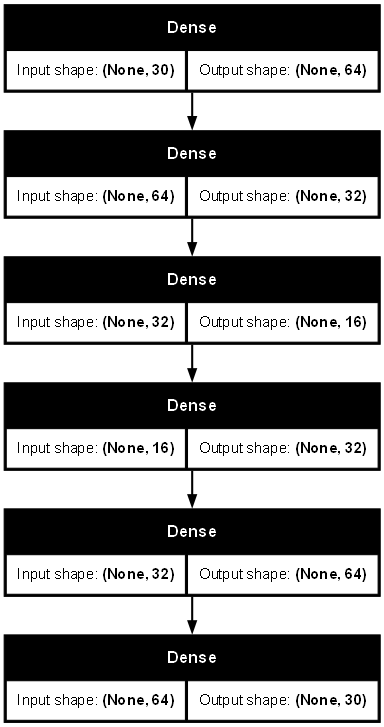

In [47]:
plot_model(autoencoder, 
           show_shapes=True, 
           to_file='autoencoder_model.png', 
           dpi=75)

In [48]:
# Train the autoencoder with normal data
history = autoencoder.fit(
    X_train_autoencoder, X_train_autoencoder,
    epochs=50,
    batch_size=256,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 903275136.0000 - val_loss: 903520832.0000
Epoch 2/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 900218304.0000 - val_loss: 903520832.0000
Epoch 3/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 899958272.0000 - val_loss: 903520832.0000
Epoch 4/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 899401024.0000 - val_loss: 903520832.0000
Epoch 5/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 898255360.0000 - val_loss: 903520832.0000
Epoch 6/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 904627584.0000 - val_loss: 903520832.0000
Epoch 7/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 901503744.0000 - val_loss: 903520832.0000
Epoch 8/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 902414080.0000 - val_loss: 903520832.0000
Epoch 9/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 901935232.0000 - val_loss: 903520832.0000
Epoch 10/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 899394432.0000 - val_

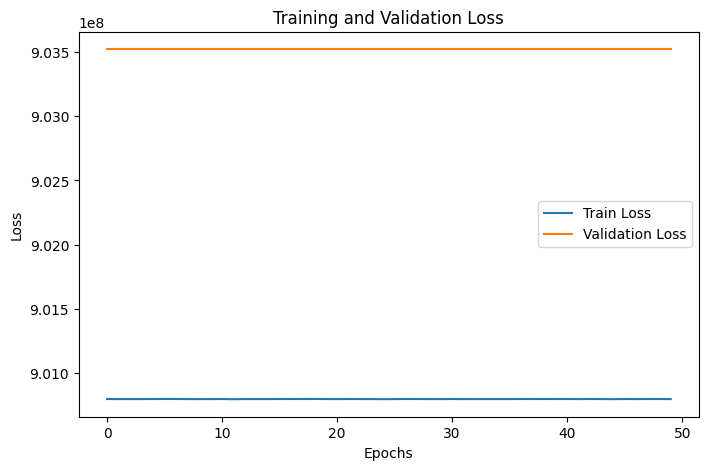

Accuracy metrics were not calculated.


In [49]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy (if it exists)
if 'accuracy' in history.history:
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
else:
    print("Accuracy metrics were not calculated.")


In [50]:
# 1. Calculate Reconstruction Errors on Training Data

# Calculate reconstruction error for training data
train_reconstructions = autoencoder.predict(X_train_autoencoder)
train_errors = np.mean(np.square(X_train_autoencoder - train_reconstructions), axis=1)

# Set threshold as 95th percentile of reconstruction errors from training data
threshold = np.percentile(train_errors, 95)
print(f"Reconstruction error threshold: {threshold}")


7112/7112 ━━━━━━━━━━━━━━━━━━━━ 7s 974us/step
Reconstruction error threshold: 2440898593.4179854


In [51]:
# 2. Test on Anomalous Data
# Evaluate on test data (both normal and anomalous transactions)
test_reconstructions = autoencoder.predict(X_test)
test_errors = np.mean(np.square(X_test - test_reconstructions), axis=1)

# Classify transactions based on the threshold
test_predictions = (test_errors > threshold).astype(int)  # 1 = anomaly, 0 = normal

# Calculate evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step
Confusion Matrix:
[[53939  2811]
 [   89 56887]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56750
           1       0.95      1.00      0.98     56976

    accuracy                           0.97    113726
   macro avg       0.98      0.97      0.97    113726
weighted avg       0.98      0.97      0.97    113726



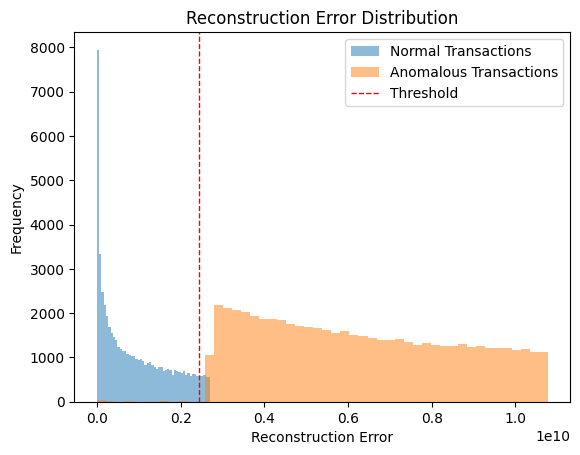

In [52]:
# 3. Visualize Reconstruction Errors
import matplotlib.pyplot as plt

# Plot histogram of reconstruction errors
plt.hist(test_errors[y_test == 0], bins=50, alpha=0.5, label='Normal Transactions')
plt.hist(test_errors[y_test == 1], bins=50, alpha=0.5, label='Anomalous Transactions')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=1, label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()


* Exmine reconstruction error

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step


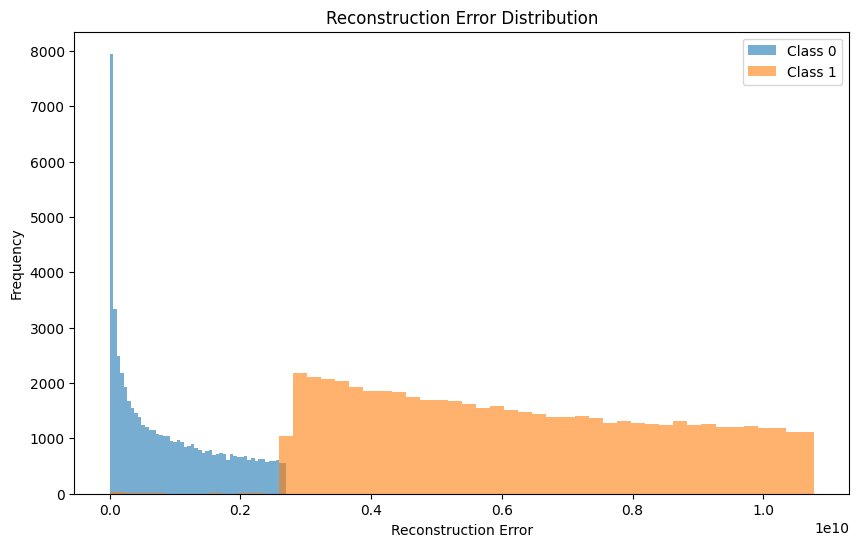

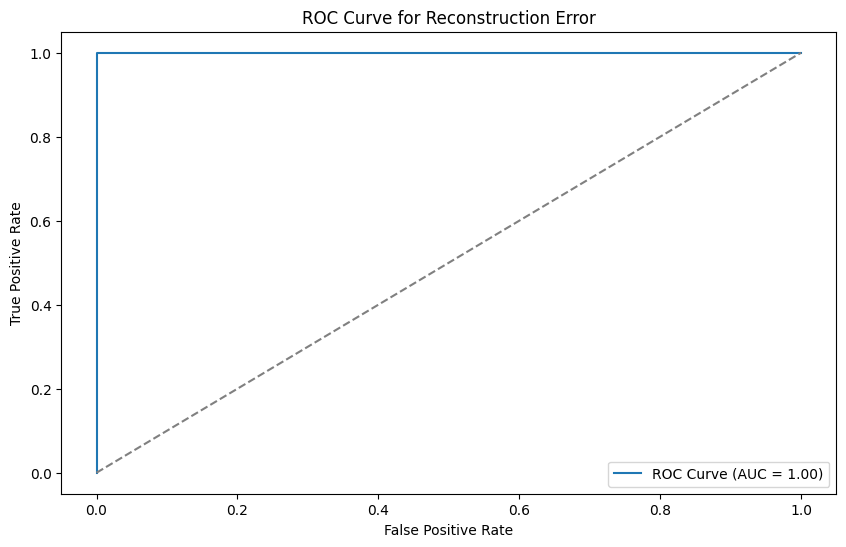

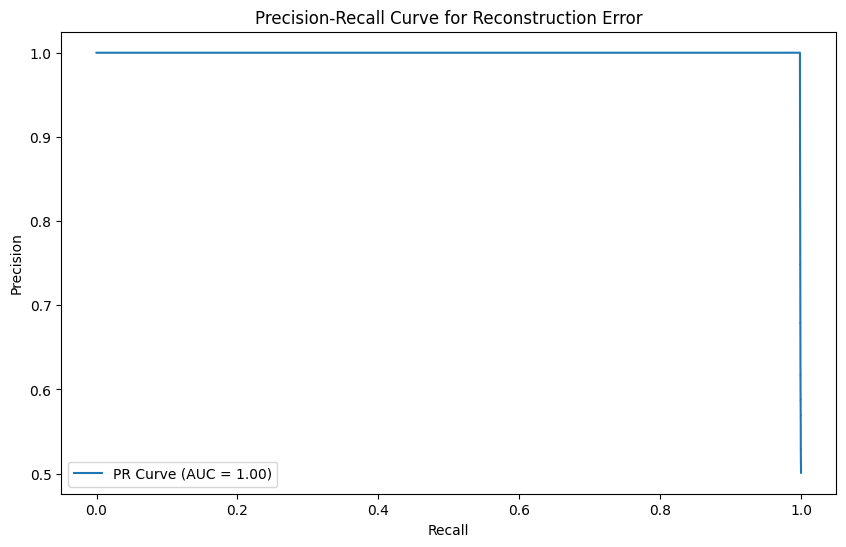

Optimal Threshold for Reconstruction Error: 2703910191.282995


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# Assuming you have the following:
# - `X_train`: Training dataset
# - `X_test`: Test dataset
# - `y_test`: True labels for the test dataset
# - `autoencoder`: Trained autoencoder model

# 1. Generate Reconstruction Errors
# Calculate reconstruction errors for the test set
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

# Add reconstruction errors as a feature for examination
reconstruction_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_label': y_test
})

# 2. Visualize Reconstruction Errors
plt.figure(figsize=(10, 6))
for label in [0, 1]:  # Assuming 0 = Non-fraud, 1 = Fraud
    subset = reconstruction_df[reconstruction_df['true_label'] == label]
    plt.hist(subset['reconstruction_error'], bins=50, alpha=0.6, label=f"Class {label}")
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Evaluate Threshold Using ROC-AUC
fpr, tpr, thresholds = roc_curve(reconstruction_df['true_label'], reconstruction_df['reconstruction_error'])
roc_auc = roc_auc_score(reconstruction_df['true_label'], reconstruction_df['reconstruction_error'])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Reconstruction Error')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 4. Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(reconstruction_df['true_label'], reconstruction_df['reconstruction_error'])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve for Reconstruction Error')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# 5. Choose a Threshold for Reconstruction Errors
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for Reconstruction Error: {optimal_threshold}")


* Add the reconstruction error as a feature to the balanced dataset

In [54]:
# Generate reconstruction error for all data
X_reconstructed = autoencoder.predict(X)
reconstruction_error = np.mean(np.power(X - X_reconstructed, 2), axis=1)

# Add reconstruction error to the original DataFrame
df_resampled['Autoencoder_Reconstruction_Error'] = reconstruction_error

# Preview the updated DataFrame
print(df_resampled.head())

17770/17770 ━━━━━━━━━━━━━━━━━━━━ 16s 903us/step
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0 -0.130006  0.727159  ...  0.217606 -0.134794  0.165959  0.126280 -0.434824   
1 -0.133118  0.347452  ... -0.605761  0.079469 -0.577395  0.190090  0.296503   
2 -0.095576 -0.261297  ...  0.702906  0.945045 -1.154666 -0.605564 -0.312895   
3 -0.065130 -0.205698  ... -0.038212 -0.214048 -1.893131  1.003963 -0.515950   
4 -0.212660  1.049921  ...  0.729727 -0.161666  0.312561 -0.414116  1.071126 

In [55]:
df_resampled.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Autoencoder_Reconstruction_Error
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0,5.686300e+05
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5,3.592639e+09
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5,3.213366e+09
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0,1.198723e-01
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0,6.736133e+08
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5,2.694472e+09
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0,6.062577e+09
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0,1.077793e+10


==================================================================================

<h2 style="color:blue;">K-Means Model</h2>

* Split Data using Blananced Dataset

In [56]:
# Step 2: Select feature columns (excluding target and Autoencoder reconstruction error)
features = df_resampled.drop(columns=['Class', 'Autoencoder_Reconstruction_Error'], axis=1)

In [57]:
features.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000


In [58]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

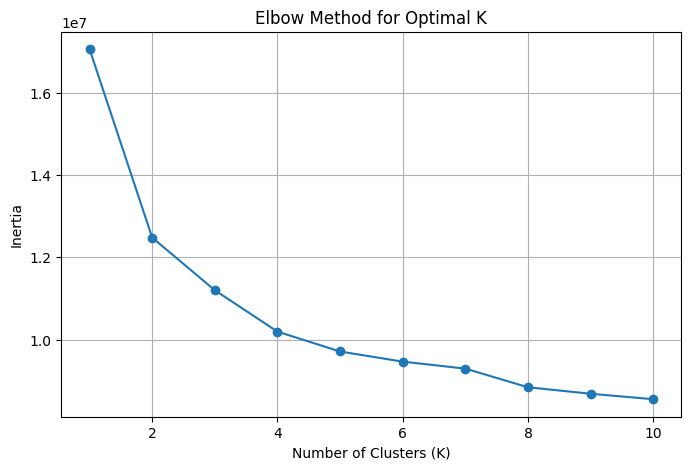

In [59]:
# Step 3: Apply K-Means clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [60]:
# Step 4: Compute K-Means reconstruction error (distance from cluster center)
# Reconstruction error is calculated as the squared Euclidean distance from the cluster center
kmeans_reconstruction_error = np.min(kmeans.transform(features_scaled), axis=1)

In [61]:
# Step 5: Add K-Means reconstruction error to the dataset
df_resampled['KMeans_Reconstruction_Error'] = kmeans_reconstruction_error

In [62]:
# Step 6: Display the updated dataset
print("\nUpdated Dataset with K-Means Reconstruction Error:")
print(df_resampled.head())


Updated Dataset with K-Means Reconstruction Error:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0 -0.130006  0.727159  ... -0.134794  0.165959  0.126280 -0.434824 -0.081230   
1 -0.133118  0.347452  ...  0.079469 -0.577395  0.190090  0.296503 -0.248052   
2 -0.095576 -0.261297  ...  0.945045 -1.154666 -0.605564 -0.312895 -0.300258   
3 -0.065130 -0.205698  ... -0.214048 -1.893131  1.003963 -0.515950 -0.165316   
4 -0.212660  1.049921  ... -0.161666  0.312561 -0.414116  1.071126  0.023

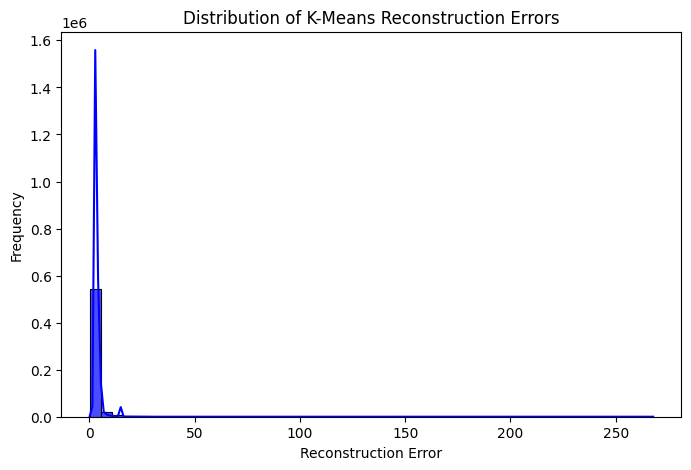

In [63]:
# Plot the distribution of K-Means reconstruction errors
plt.figure(figsize=(8, 5))
sns.histplot(df_resampled['KMeans_Reconstruction_Error'], kde=True, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of K-Means Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

=======================================================================

<h2 style="color:blue;">CNN Model</h2>

In [64]:
# Step 3: Prepare the dataset for CNN
# Select features (including reconstruction errors) and labels
X = df_resampled.drop(columns=['Class'], axis=1)  # Features
y = df_resampled['Class']  # Labels

In [65]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Reshape features for CNN (CNN expects input in 3D: [samples, timesteps, features])
# Here, timesteps = 1 since we have a single-dimensional feature space
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [67]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

In [68]:
# Step 5: Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Installed\Python_3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,969 (921.75 KB)

 Trainable params: 235,969 (921.75 KB)

 Non-trainable params: 0 (0.00 B)

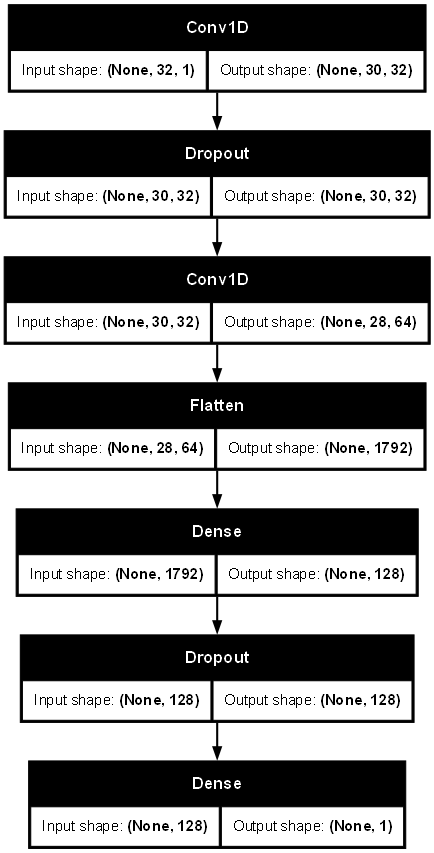

In [69]:
plot_model(model, 
           show_shapes=True, 
           to_file='cnn_model.png', 
           dpi=75)

In [70]:
# Step 6: Train the CNN model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 116s 10ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 2/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 109s 7ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 3/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 4/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 5/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 6/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9996 - val_loss: 0.0016
Epoch 7/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 8/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 110s 10ms/step - accur

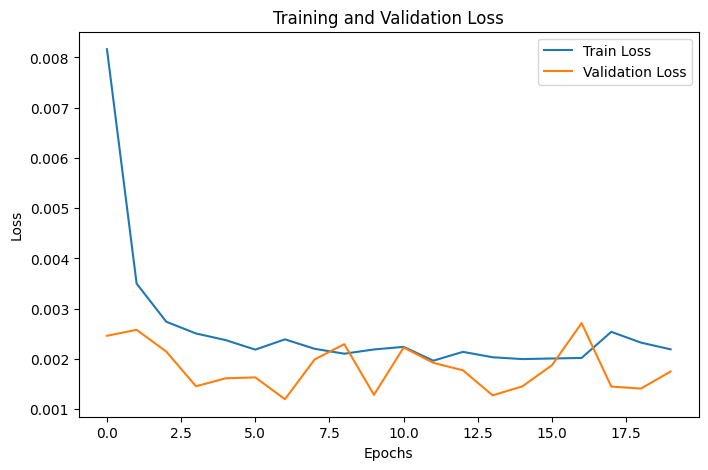

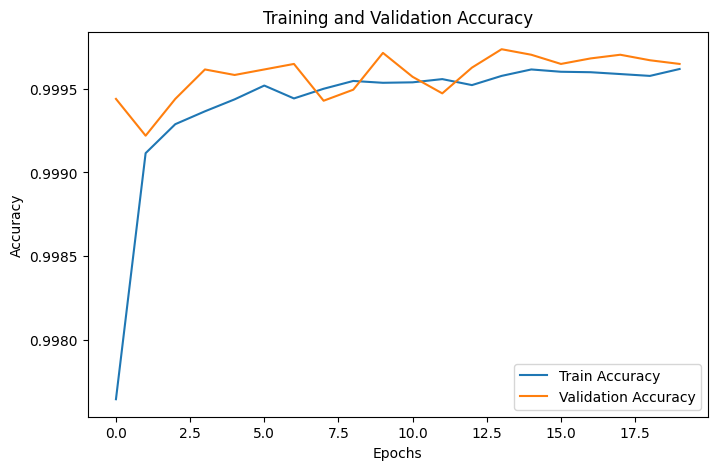

In [71]:
# Step 9: Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
# Step 7: Evaluate the model
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 1.00


In [73]:
# Step 8: Generate predictions and classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [74]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[56725    25]
 [   20 56956]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


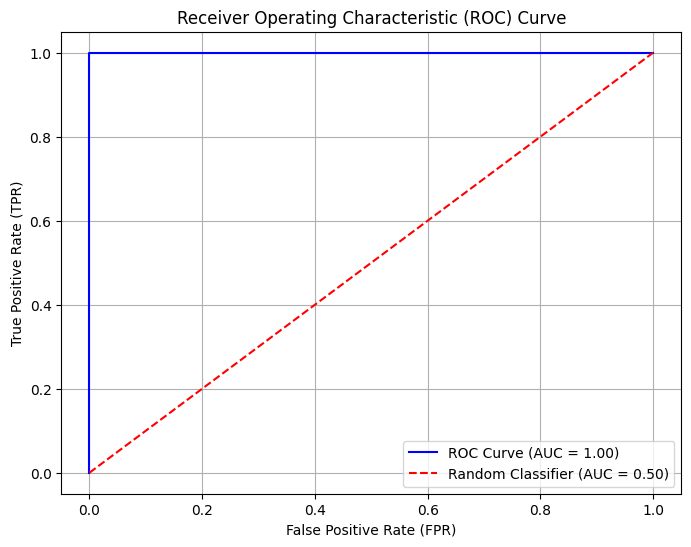

In [75]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 8: Generate predictions (probabilities) for ROC Curve
y_pred_prob = model.predict(X_test)  # Predict probabilities instead of binary labels

# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)  # Calculate Area Under the Curve (AUC)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Confusion Matrix:
[[56725    25]
 [   20 56956]]


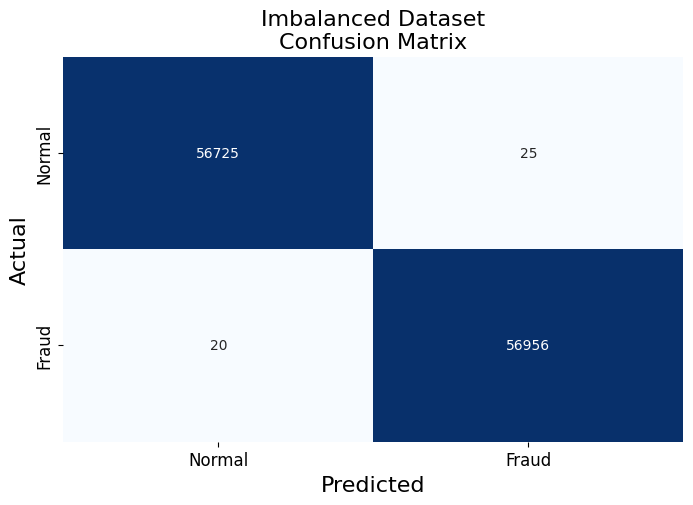

In [77]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Set the figure size
plt.figure(figsize=(8, 5))

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS, cbar=False)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Imbalanced Dataset\nConfusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


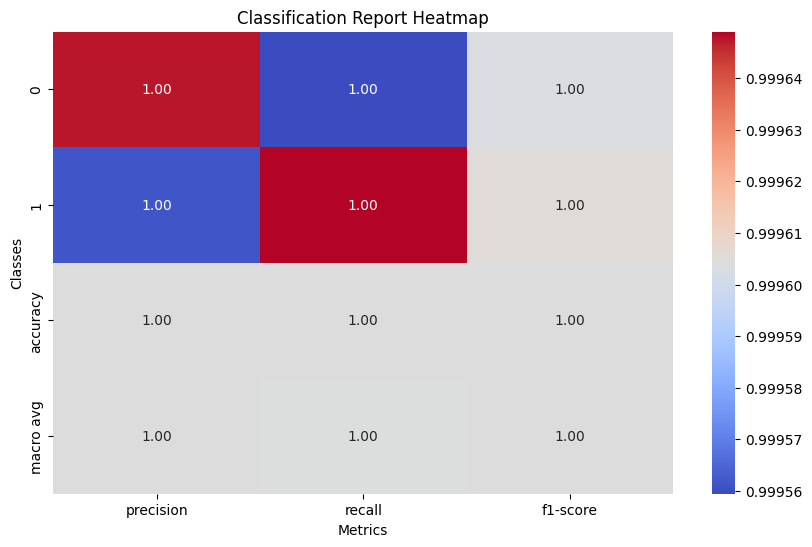

In [78]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report into a DataFrame for visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


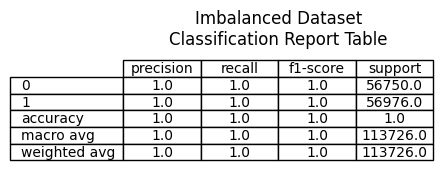

In [79]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the table
fig, ax = plt.subplots(figsize=(4, 1.5))  # Set the figure size
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=report_df.round(2).values, 
                 colLabels=report_df.columns, 
                 rowLabels=report_df.index, 
                 loc="center", 
                 cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Imbalanced Dataset\nClassification Report Table")
plt.show()
